In [1]:
# can we create np arrays from dictionaries?
import numpy as np

In [8]:
dict_test = [{1: 1, 2: 2, 3: 3}, {4: 4, 5: 5, 6: 6}]
dict_array = np.array(dict_test)
dict_array.shape

(2,)

In [16]:
# can we create array with strings of different sizes?
string_list = ["two", "three"]
np.array(string_list, dtype="U10")

array(['two', 'three'], dtype='<U10')

In [20]:
# casting types
arr = np.array(np.arange(10))
arr.dtype

dtype('int64')

In [22]:
arr.astype(float).dtype

dtype('float64')

In [ ]:
arr = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
arr

In [25]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [26]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [36]:
(arr**arr)[1][2]

np.float64(46656.0)

In [37]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [38]:
arr / 2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [39]:
arr2 = np.array([[0.0, 4.0, 1.0], [7.0, 2.0, 12.0]])

In [40]:
arr2 == arr

array([[False, False, False],
       [False, False, False]])

In [41]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Array Indexing
### 1-dimensional arrays

In [56]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
arr[5:8]

array([5, 6, 7])

In [58]:
arr[5:8] = 12
arr
# as we can note, array slices are views of the array, not copies. follow the next cell's example:

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [59]:
arr_slice = arr[5:8]
arr_slice -= 1
arr

array([ 0,  1,  2,  3,  4, 11, 11, 11,  8,  9])

In [60]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [61]:
arr[:] = 32
arr

array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32])

## higher dimension arrays indexing and slicing

In [72]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [73]:
# these are equivalent
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


In [75]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.shape

(2, 2, 3)

In [79]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [81]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [82]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [83]:
arr3d[0, 1]

array([4, 5, 6])

## slicing n-dimension arrays

In [85]:
print(arr2d)
arr2d[:2, 1:]
# returns the first two rows, from their second element

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[2, 3],
       [5, 6]])

In [87]:
lower_dim_slice = arr2d[1, :2]
# returns the second row, first 2 columns
print(lower_dim_slice)

[4 5]


In [90]:
lower_dim_slice.shape

(2,)

## Boolean Indexing

Where we index an array with another array of booleans, refering to True values

In [94]:
# consider this array of names with some duplicates:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

# now we create an array of booleans, such as true for "Bob"
booleans = names == "Bob"
booleans

array([ True, False, False,  True, False, False, False])

In [93]:
# suppose we have a different array of some data:
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2], [-12, -4], [3, 4]])
data.shape

(7, 2)

In [95]:
# as both arrays have the same number of columns, we can index the columns of the data array with the boolean array:
data[booleans]  # should return [4, 7] and [0, 0]

array([[4, 7],
       [0, 0]])

In [97]:
# we can mix this with slicing, too. for selecting only the second value of these selected columns:
data[booleans, 1:]

array([[7],
       [0]])

In [99]:
# the ~ operator inverts the boolean values. May be used to "anti-filter" the array:
~(names == "Bob")

array([False,  True,  True, False,  True,  True,  True])

In [101]:
data[~booleans]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [104]:
(names == "Bob") | (names == "Will")

array([ True, False,  True,  True,  True, False, False])

## Fancy Indexing

Using arrays as indexer to select a subset of an array in a particular order

In [105]:
# consider this array:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [108]:
# if we create an array of integers in a certain order...
indexer = np.array([4, 0, 7, 1])
# we can index our array with this indexer!
arr[indexer]

array([[4., 4., 4., 4.],
       [0., 0., 0., 0.],
       [7., 7., 7., 7.],
       [1., 1., 1., 1.]])

### Multiple arrays for indexing

We can pass multiple arrays for indexing too. Consider:

In [109]:
arr = np.arange(32).reshape(8, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [110]:
indexer1 = [7, 4, 1]
indexer2 = [3, 1, 2]
arr[indexer1, indexer2]

array([31, 17,  6])

In [113]:
# we can also create a region with the combination of the indices passed as so:
arr[indexer1][:, indexer2]

array([[31, 29, 30],
       [19, 17, 18],
       [ 7,  5,  6]])

In [121]:
# assigning the fancy indexed array to a variable creates a copy;
# assigning a value to the fancy indexed array WITHOUT a variable modifies the array.
arr[indexer1, indexer2] = 0
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  0,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16,  0, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30,  0]])

In [ ]:
#  transposing arrays
# We can transpose arrays with the transpose method and the T attribute
arr = np.arange(15).reshape((3, 5))
arr
#

In [ ]:
arr.T

In [ ]:
# we can do matrix multiplication in two ways:
# np.dot way:
np.dot(arr, arr.T)

In [ ]:
# @ operator
arr @ arr.T

## Swapaxes

the T attribute is a special case of the swapaxes function, which swaps two axes. This function can be more generally used for n dimension arrays.
It does not make a copy.

In [24]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
arr.swapaxes(0, 1)

In [ ]:
arr

## array oriented programming
Instead of using loops, we can we array functions to express some complicated or big operations
Suppose we have an two arrays (x and y) and we wish to evaluate sqrt(x² + y²)

In [3]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]],
      shape=(1000, 1000))

In [4]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]], shape=(1000, 1000))

Text(0.5, 1.0, 'image plot of $\\sqrt{x² + y²} for a grid of value')

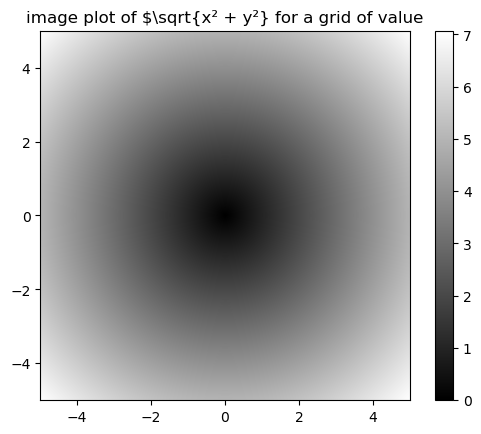

In [5]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("image plot of $\\sqrt{x² + y²} for a grid of value")

In [6]:
rng = np.random.default_rng(12345)
arr = rng.standard_normal((5, 4))
arr

array([[-1.42382504,  1.26372846, -0.87066174, -0.25917323],
       [-0.07534331, -0.74088465, -1.3677927 ,  0.6488928 ],
       [ 0.36105811, -1.95286306,  2.34740965,  0.96849691],
       [-0.75938718,  0.90219827, -0.46695317, -0.06068952],
       [ 0.78884434, -1.25666813,  0.57585751,  1.39897899]])

In [7]:
arr.mean()

np.float64(0.0010611661248891013)

In [8]:
np.mean(arr)

# [markdown]
# ## Boolean arrays and their methods

np.float64(0.0010611661248891013)

In [9]:
# boolean arrays and their methods
arr = rng.standard_normal(100)
(arr > 0).sum()

np.int64(52)

In [10]:
(arr < -0).sum()

np.int64(48)

In [11]:
# any checks if any is true, all checksif all are true
bools = arr > 0
bools.any()

np.True_

In [12]:
bools.all()

np.False_

In [13]:

# [markdown]
# ## Random walk with numpy

In [14]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [15]:
walk.min()

np.int64(-8)

In [16]:
walk.max()

np.int64(50)

In [17]:
(np.abs(walk) >= 10).argmax()

np.int64(155)

In [18]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], shape=(5000, 1000))

In [19]:
walks.max()

np.int64(114)

In [20]:
walks.min()

np.int64(-120)

In [21]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True,  True, ...,  True, False,  True], shape=(5000,))

In [22]:
hits30.sum()

np.int64(3395)

In [23]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541], shape=(3395,))

In [24]:
crossing_times.mean()

np.float64(500.5699558173785)